In [34]:
import requests
import json
import pandas as pd
import csv
from datetime import datetime
from datetime import timedelta

yourapikey = "jEHXLRe13pKScLWAfz4dCSM1ADNPFRDeVEmJ5WtQ"
youremail = "tbm17160@hotmail.com"

In [2]:
url = 'https://developer.nrel.gov/api/solar/nsrdb_data_query.json?api_key=jEHXLRe13pKScLWAfz4dCSM1ADNPFRDeVEmJ5WtQ&lat=1.371661&lon=103.823306'
response = requests.get(url).json()

print(json.dumps(response, indent = 1))

{
 "inputs": {
  "body": {},
  "params": {},
  "query": {
   "lat": "1.371661",
   "lon": "103.823306"
  }
 },
 "metadata": {
  "version": "2.0.0",
  "resultset": {
   "count": 4
  }
 },
 "status": 200,
 "outputs": [
  {
   "apiDocs": "https://developer.nrel.gov/docs/solar/nsrdb/himawari-download/",
   "availableIntervals": [
    10,
    30,
    60
   ],
   "enabled": true,
   "displayName": "Himawari",
   "metadataLink": "https://nsrdb.nrel.gov",
   "name": "himawari",
   "ranking": 20,
   "availableYears": [
    2016,
    2017,
    2018,
    2019,
    2020
   ],
   "apiUrl": "https://developer.nrel.gov/api/nsrdb/v2/solar/himawari-download",
   "links": [
    {
     "year": 2016,
     "interval": 10,
     "link": "https://developer.nrel.gov/api/nsrdb/v2/solar/himawari-download.csv?names=2016&wkt=POINT%28103.823306+1.371661%29&interval=10&api_key=yourapikey&email=youremail"
    },
    {
     "year": 2017,
     "interval": 10,
     "link": "https://developer.nrel.gov/api/nsrdb/v2/solar/

In [3]:
url = f"https://developer.nrel.gov/api/nsrdb/v2/solar/himawari-download.csv?\
names=2016&wkt=POINT%28103.823306+1.371661%29&interval=10&api_key={yourapikey}&email={youremail}"

response = requests.get(url)

In [4]:
open('test.csv', 'wb').write(response.content)

5848221

In [5]:
# with open('some_file.csv', 'wb') as opened_file:
#     opened_file.write(response.content)

In [39]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H %M') + timedelta(hours=8)

In [90]:
df = pd.read_csv("test.csv", skiprows=2, parse_dates = [['Year', 'Month', 'Day', 'Hour', 'Minute']],index_col=[0], date_parser=parse)
df.drop(columns = ["Cloud Type","Fill Flag", "Clearsky DHI", "Clearsky DNI", "Clearsky GHI", "DHI","DNI"], inplace=True)
df

,Temperature,Dew Point,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
Year_Month_Day_Hour_Minute,,,,,,,,,,,
2016-01-01 08:00:00,26.6,25.7,60,0.252,94.54,78.48,0.15,1011,5.8,20,3.3
2016-01-01 08:10:00,26.8,25.7,76,0.252,93.44,76.21,0.15,1011,5.8,21,3.3
2016-01-01 08:20:00,26.9,25.7,93,0.252,92.90,73.94,0.15,1011,5.8,21,3.4
2016-01-01 08:30:00,27.0,25.7,158,0.252,92.36,71.68,0.15,1011,5.8,22,3.5
2016-01-01 08:40:00,27.2,25.9,180,0.253,92.39,69.42,0.15,1011,5.8,22,3.6
...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01 07:10:00,25.4,24.8,0,0.253,96.75,89.64,0.12,1005,5.9,23,2.1
2017-01-01 07:20:00,25.4,24.8,22,0.253,96.75,87.55,0.12,1005,5.9,23,2.1
2017-01-01 07:30:00,25.4,24.8,45,0.253,96.75,85.34,0.12,1005,5.9,23,2.1


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2016-01-01 08:00:00 to 2017-01-01 07:50:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         52560 non-null  float64
 1   Dew Point           52560 non-null  float64
 2   GHI                 52560 non-null  int64  
 3   Ozone               52560 non-null  float64
 4   Relative Humidity   52560 non-null  float64
 5   Solar Zenith Angle  52560 non-null  float64
 6   Surface Albedo      52560 non-null  float64
 7   Pressure            52560 non-null  int64  
 8   Precipitable Water  52560 non-null  float64
 9   Wind Direction      52560 non-null  int64  
 10  Wind Speed          52560 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 4.8 MB


In [7]:
import seaborn as sns

<AxesSubplot:xlabel='GHI', ylabel='Count'>

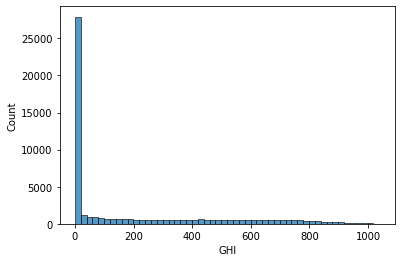

In [16]:
sns.histplot(data=df, x=df.GHI)

<AxesSubplot:>

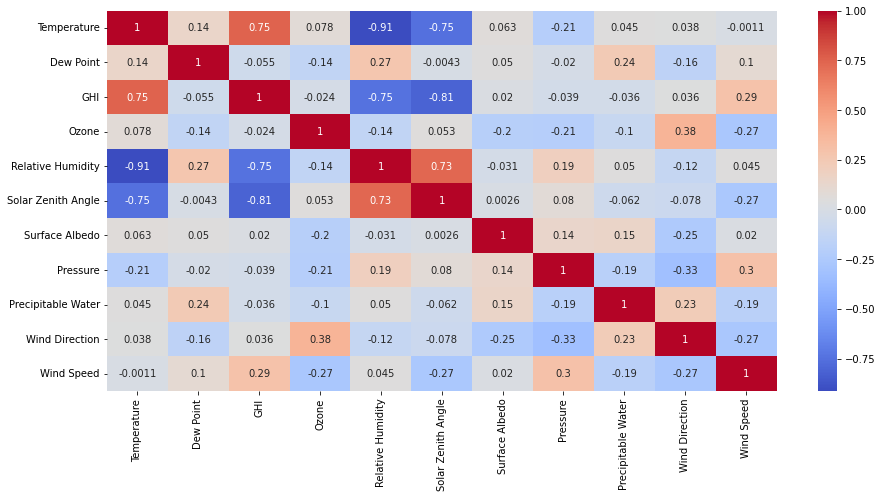

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(method="pearson"),cmap='coolwarm',annot=True)

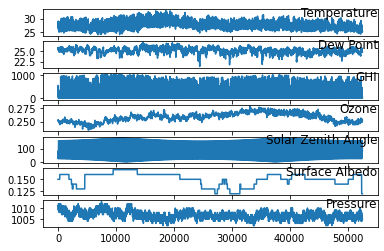

In [94]:
import matplotlib.pyplot as plt
# load dataset

values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

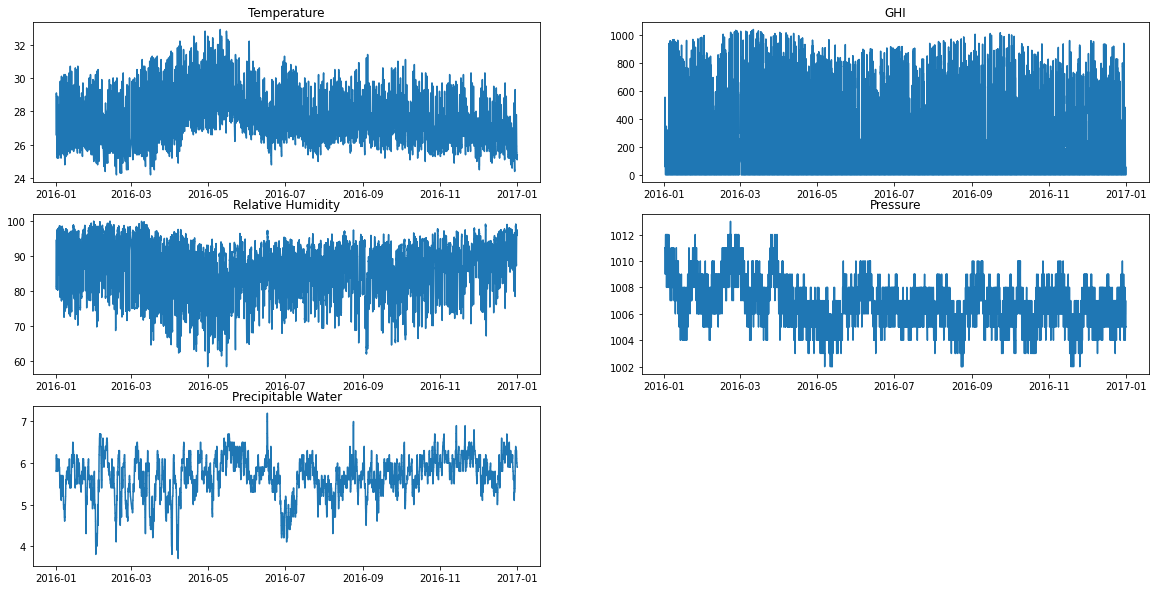

In [95]:
labels = ["Temperature", "GHI", "Relative Humidity", "Pressure", "Precipitable Water"]
plt.figure(figsize=(20,10))
for i in range(len(labels)):
    plt.subplot(3,2,i+1)
    plt.plot(df.index, df[labels[i]])
    plt.title(labels[i])

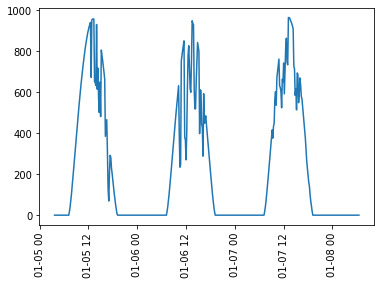

In [96]:
plt.plot(df.index[550:1000],df["GHI"][550:1000])
plt.xticks(rotation=90)
plt.show()

In [97]:
# Time Series split
len_ = int(0.8*df.shape[0])
df_train = df[:len_]
df_test = df[len_:]

In [98]:
# Scale with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
columns = df.columns

scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=columns, index=df_train.index)
df_test = pd.DataFrame(scaler.transform(df_test), columns=columns, index=df_test.index)
df_train.head()

,Temperature,Dew Point,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
Year_Month_Day_Hour_Minute,,,,,,,,,,,
2016-01-01 08:00:00,0.275862,0.758621,0.057803,0.386364,0.868529,0.436924,0.6,0.818182,0.6,0.052925,0.581818
2016-01-01 08:10:00,0.298851,0.758621,0.073218,0.386364,0.842042,0.424236,0.6,0.818182,0.6,0.055710,0.581818
2016-01-01 08:20:00,0.310345,0.758621,0.089595,0.386364,0.829039,0.411548,0.6,0.818182,0.6,0.055710,0.600000
2016-01-01 08:30:00,0.321839,0.758621,0.152216,0.386364,0.816037,0.398916,0.6,0.818182,0.6,0.058496,0.618182
2016-01-01 08:40:00,0.344828,0.793103,0.173410,0.409091,0.816759,0.386284,0.6,0.818182,0.6,0.058496,0.636364


In [101]:
import numpy as np

def subsample_sequence(df, length):
    """
    Given the initial dataframe `df`, return a shorter dataframe sequence of length `length`.
    This shorter sequence should be selected at random.
    """
    
    last_possible = df.shape[0] - length
    
    random_start = np.random.randint(0, last_possible)
    df_sample = df[random_start: random_start+length]
    
    return df_sample

def compute_means(X, df_mean):
    '''utils'''
    # Compute means of X
    means = X.mean()
    
    # Case if ALL values of at least one feature of X are NaN, then reaplace with the whole df_mean
    if means.isna().sum() != 0:
        means.fillna(df_mean, inplace=True)
        
    return means

def split_subsample_sequence(df, length, df_mean=None):
    """Return one single sample (Xi, yi) containing one sequence each of length `length`"""
    features_names = ['Temperature', 'Dew Point', 'Ozone', 'Relative Humidity', 
                      'Solar Zenith Angle', 'Surface Albedo', "Pressure",
                     "Precipitable Water", "Wind Direction", "Wind Speed"]
    
    # Trick to save time during the recursive calls
    if df_mean is None:
        df_mean = df[features_names].mean()
        
    df_subsample = subsample_sequence(df, length).copy()
    
    # Let's drop any row without a target! We need targets to fit our model
    df_subsample.dropna(how='any', subset=['GHI'], inplace=True)
    
    # Create y_sample
    if df_subsample.shape[0] == 0: # Case if there is no targets at all remaining
        return split_subsample_sequence(df, length, df_mean) # Redraw by recursive call until it's not the case anymore
    y_sample = df_subsample[['GHI']]
    
    # Create X_sample
    X_sample = df_subsample[features_names]
    if X_sample.isna().sum().sum() !=0:  # Case X_sample has some NaNs
        X_sample = X_sample.fillna(compute_means(X_sample, df_mean))
        
    return np.array(X_sample), np.array(y_sample)

def get_X_y(df, sequence_lengths):
    '''Return a dataset (X, y)'''
    X, y = [], []

    for length in sequence_lengths:
        xi, yi = split_subsample_sequence(df, length)
        X.append(xi)
        y.append(yi)
        
    return X, y

In [102]:
# Here we define the parameter to generate our train/test sets
train_size = 1000
test_size = round(0.2 * train_size)

min_seq_len = 15
max_seq_len = 30

In [103]:
# Let's generate some train/test sets
sequence_lengths_train = np.random.randint(low=min_seq_len, high=max_seq_len, size=train_size)
X_train, y_train = get_X_y(df_train, sequence_lengths_train)

sequence_lengths_test = np.random.randint(low=min_seq_len, high=max_seq_len, size=test_size)
X_test, y_test = get_X_y(df_test, sequence_lengths_test)

In [104]:
# Test if there are no NaN in you dataset
assert np.sum([np.isnan(x[0]).sum() for x in X_train]) == 0
assert np.sum([np.isnan(x[0]).sum() for x in X_test]) == 0
assert np.sum([np.isnan(y[0]).sum() for y in y_train]) == 0
assert np.sum([np.isnan(y[0]).sum() for y in y_test]) == 0

# Check your shapes
print("X_train type", type(X_train))
print("n_sequence", len(X_train))
print("shape sequence 0", X_train[0].shape)
print("shape sequence 1", X_train[1].shape)
print("...")
print("\n")
print("y_train type", type(y_train))
print("n_sequence", len(X_train))
print("shape sequence 0", X_train[0].shape)
print("shape sequence 1", X_train[1].shape)
print("...")

X_train type <class 'list'>
n_sequence 1000
shape sequence 0 (23, 10)
shape sequence 1 (15, 10)
...


y_train type <class 'list'>
n_sequence 1000
shape sequence 0 (23, 10)
shape sequence 1 (15, 10)
...


In [105]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train, value=-1000., dtype=float, padding='post', maxlen=30)
y_train_pad = pad_sequences(y_train, value=-1000., dtype=float, padding='post', maxlen=30)

X_test_pad = pad_sequences(X_test, value=-1000., dtype=float, padding='post', maxlen=30)
y_test_pad = pad_sequences(y_test, value=-1000., dtype=float, padding='post', maxlen=30)

X_train_pad.shape

2022-08-12 22:24:40.496898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-12 22:24:40.496942: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(1000, 30, 10)

In [106]:
# We here decide to predict the mean of the train set y_train
y_pred = np.mean([_ for elt in y_train for _ in elt])
bench_res = np.mean(np.abs([_-y_pred for elt in y_test for _ in elt]))

print(f'Benchmark MAE on the test set : {bench_res:.4f}')

Benchmark MAE on the test set : 0.2206


In [110]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

def init_model():
    
    model = models.Sequential()
    model.add(layers.Masking(mask_value=-1000., input_shape=(30,10)))
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, return_sequences=True, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer='rmsprop', 
                  metrics=['mae'])
    model.compile(loss='mse', 
                  optimizer=RMSprop(learning_rate=0.0003), 
                  metrics=['mae'])
    
    return model

init_model().summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 30, 10)            0         
                                                                 
 lstm_4 (LSTM)               (None, 30, 20)            2480      
                                                                 
 lstm_5 (LSTM)               (None, 30, 10)            1240      
                                                                 
 dense_4 (Dense)             (None, 30, 5)             55        
                                                                 
 dense_5 (Dense)             (None, 30, 1)             6         
                                                                 
Total params: 3,781
Trainable params: 3,781
Non-trainable params: 0
_________________________________________________________________


In [112]:
from tensorflow.keras.callbacks import EarlyStopping

model = init_model()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

history = model.fit(X_train_pad, y_train_pad,
            validation_split=0.2,
            epochs=1000, 
            batch_size=64,
            callbacks=[es], verbose=1)

Epoch 1/1000
13/13 [==============================] - 5s 129ms/step - loss: 0.0715 - mae: 0.2168 - val_loss: 0.0550 - val_mae: 0.2016
Epoch 2/1000
13/13 [==============================] - 0s 23ms/step - loss: 0.0612 - mae: 0.2183 - val_loss: 0.0499 - val_mae: 0.1988
Epoch 3/1000
13/13 [==============================] - 0s 23ms/step - loss: 0.0560 - mae: 0.2154 - val_loss: 0.0461 - val_mae: 0.1898
Epoch 4/1000
13/13 [==============================] - 0s 23ms/step - loss: 0.0516 - mae: 0.2045 - val_loss: 0.0424 - val_mae: 0.1857
Epoch 5/1000
13/13 [==============================] - 0s 23ms/step - loss: 0.0471 - mae: 0.1957 - val_loss: 0.0389 - val_mae: 0.1735
Epoch 6/1000
13/13 [==============================] - 0s 23ms/step - loss: 0.0431 - mae: 0.1840 - val_loss: 0.0361 - val_mae: 0.1664
Epoch 7/1000
13/13 [==============================] - 0s 23ms/step - loss: 0.0396 - mae: 0.1739 - val_loss: 0.0337 - val_mae: 0.1580
Epoch 8/1000
13/13 [==============================] - 0s 23ms/step -

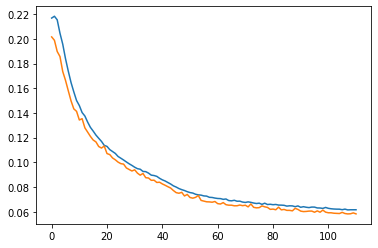

In [113]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

In [114]:
res = model.evaluate(X_test_pad, y_test_pad, verbose=0)

print(f'MAE on the test set : {res[1]:.4f}, or {res[1]/bench_res:.2f} times the benchmark')

MAE on the test set : 0.0786, or 0.36 times the benchmark


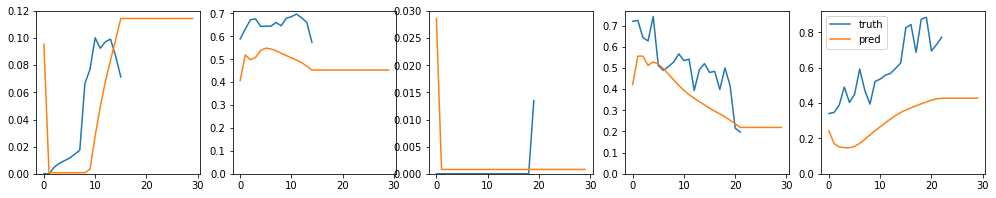

In [116]:
plt.figure(figsize=(17,3))
for id_plot, id_seq in enumerate(np.random.randint(low=0,high=len(X_test),size=5)):
    plt.subplot(1, 5, id_plot+1)
    plt.plot(y_test[id_seq], label='truth')
    plt.plot(model.predict(X_test_pad)[id_seq], label='pred')
    plt.ylim(ymin=0)
plt.legend();

### some qns
1. shd i index the datetime? no
2. shd i remove the night time?
3. how to predict properly
try varima / arimax
auto arimax put the other features as exogenous

i) univariate
ii) multivartaie armima
iii) DL 

evaluation 

take MAE / the mean of the target y. (without scaling)
or MAPE.
